# Introduction to TSR distance estimation

In [1]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


## Reading the database


In [2]:
# df = pd.HDFStore('store.h5')['df']
df = pd.read_pickle("store.pickle")
df.head()

,Z,currImage,currRect,egoMotion,focal,prevImage,prevRect
0,13.85,16-06-05_17-25-17_Single_0026_frame52.img,"[117, 202, 650, 736]","[[0.999999578399, -0.000895476002402, -0.00020...",1612,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]"
1,16.7,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]","[[0.999996631121, -0.00259569842352, -9.765754...",1612,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]"
2,None,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]","[[0.999999886938, 0.000469688477194, 7.4272939...",1612,16-06-05_17-25-17_Single_0026_frame49.img,"[299, 351, 605, 659]"


### Image principal point 

In [3]:
image = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')
print(image.im.shape)
print(image.origin)
print(image.rect)

(960, 1280)
[612 508]
[-612  668 -404  451]


### Focal length 

In [4]:
df['focal']

0    1612
1    1612
2    1612
Name: focal, dtype: int64

### Prev and current image rect

In [5]:
df[['prevRect','currRect']]

,prevRect,currRect
0,"[200, 268, 625, 701]","[117, 202, 650, 736]"
1,"[257, 317, 615, 677]","[200, 268, 625, 701]"
2,"[299, 351, 605, 659]","[257, 317, 615, 677]"


### Ego motion matrix

In [6]:
for em in df.egoMotion:
    print(em.shape)
    print(em)
    print()

(4, 4)
[[  9.99999578e-01  -8.95476002e-04  -2.03283874e-04   5.62752837e-02]
 [  8.95523797e-04   9.99999571e-01   2.35143793e-04  -5.88343605e-02]
 [  2.03073221e-04  -2.35325740e-04   9.99999952e-01  -2.89097313e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]

(4, 4)
[[  9.99996631e-01  -2.59569842e-03  -9.76575490e-06   5.34051704e-02]
 [  2.59569118e-03   9.99996400e-01  -6.80046032e-04  -5.12130713e-02]
 [  1.15309142e-05   6.80018392e-04   9.99999769e-01  -2.88863401e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]

(4, 4)
[[  9.99999887e-01   4.69688477e-04   7.42729400e-05   5.69971963e-02]
 [ -4.69526179e-04   9.99997535e-01  -2.17027886e-03  -4.87108894e-02]
 [ -7.52921118e-05   2.17024375e-03   9.99997642e-01  -2.88552559e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]



### Display image

[117, 202, 650, 736]


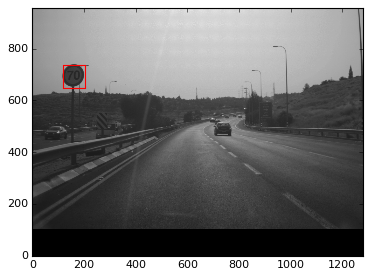

In [7]:
import matplotlib.patches as patches

# flip image vertically
plt.imshow(image.im,cmap='gray',origin='lower')
# plt.plot(*image.origin[::-1], marker='+', markersize=10, color="red")
rect = df.iloc[0].currRect
print(rect)
rect = patches.Rectangle(rect[::2],rect[1]-rect[0],rect[3]-rect[2],linewidth=1,edgecolor='r',facecolor='none')
gca().add_patch(rect)


# Convolution using scipy

In [8]:
# create artifical image with constant positive slope 
my_image = np.arange(8) + np.arange(8)[:,np.newaxis] 
my_image

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [9]:
sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
sobel_kernel

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [10]:
from scipy import signal as sg

In [11]:
# help(sg.convolve2d)

In [12]:
my_image

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [13]:
pdx = sg.convolve2d(my_image, sobel_kernel, "same") 
# pdx = sg.convolve2d(my_image, sobel_kernel, "valid") 
print(pdx.shape)
pdx

(8, 8)


array([[-0.5  , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 ,  2.375],
       [-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  3.5  ],
       [-1.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  4.   ],
       [-2.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  4.5  ],
       [-2.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  5.   ],
       [-3.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  5.5  ],
       [-3.5  , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,  6.   ],
       [-2.875, -0.75 , -0.75 , -0.75 , -0.75 , -0.75 , -0.75 ,  4.75 ]])

## Maximum filter  

In [14]:
from scipy.ndimage.filters import maximum_filter

In [15]:
# help(maximum_filter)

In [16]:
my_image

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13],
       [ 7,  8,  9, 10, 11, 12, 13, 14]])

In [17]:
maximum_filter(my_image, 3)

array([[ 2,  3,  4,  5,  6,  7,  8,  8],
       [ 3,  4,  5,  6,  7,  8,  9,  9],
       [ 4,  5,  6,  7,  8,  9, 10, 10],
       [ 5,  6,  7,  8,  9, 10, 11, 11],
       [ 6,  7,  8,  9, 10, 11, 12, 12],
       [ 7,  8,  9, 10, 11, 12, 13, 13],
       [ 8,  9, 10, 11, 12, 13, 14, 14],
       [ 8,  9, 10, 11, 12, 13, 14, 14]])

In [18]:
maximum_filter(my_image, 5)

array([[ 4,  5,  6,  7,  8,  9,  9,  9],
       [ 5,  6,  7,  8,  9, 10, 10, 10],
       [ 6,  7,  8,  9, 10, 11, 11, 11],
       [ 7,  8,  9, 10, 11, 12, 12, 12],
       [ 8,  9, 10, 11, 12, 13, 13, 13],
       [ 9, 10, 11, 12, 13, 14, 14, 14],
       [ 9, 10, 11, 12, 13, 14, 14, 14],
       [ 9, 10, 11, 12, 13, 14, 14, 14]])

## ndimage - find local max pixels

In [19]:
from scipy import ndimage

## Final results

In [20]:
df['Z']

0    13.85
1     16.7
2     None
Name: Z, dtype: object

In [ ]:
#df.index=np.arange(len(df))
#df
#df.to_json("store.json")
#df.to_pickle("store.pickle")